In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.mixture import GaussianMixture
from pandas.api.types import CategoricalDtype
import pickle
from iaml_cw2_helpers import *

In [2]:
Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_Q2_dataset()

Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean(Xtrn, axis = 0)
Xtrn_m = Xtrn - Xmean; Xtst_m = Xtst - Xmean

Number of instances: 7800, number of attributes: 784
1.0 0.0 0.17737719254368406 0.3349824841708448
Number of instances: 2600, number of attributes: 784
1.0 0.0 0.17563382275987316 0.3334625647782058


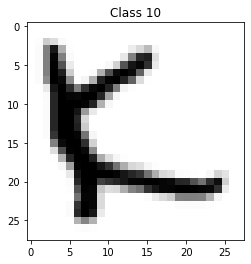

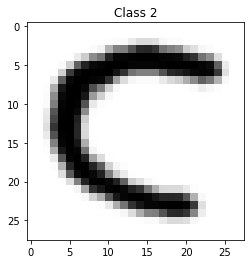

In [3]:
def iaml212cw2_q2_1():
    print('Number of instances: {}, number of attributes: {}'.format(Xtrn.shape[0], Xtrn.shape[1]))
    Xtrndf = pd.DataFrame(Xtrn)
    print(np.max(Xtrn), np.min(Xtrn), np.mean(Xtrn), np.std(Xtrn))
    # print(Xtrndf.describe())

    print('Number of instances: {}, number of attributes: {}'.format(Xtst.shape[0], Xtst.shape[1]))
    Xtstdf = pd.DataFrame(Xtst)
    print(np.max(Xtst), np.min(Xtst), np.mean(Xtst), np.std(Xtst))
    # print(Xtstdf.describe())
    # Xtst.describe()
    plt.imshow(Xtrn[0].reshape((28,28)).T, cmap="gray_r")
    plt.title(f"Class {Ytrn[0]}")
    plt.show()
    plt.imshow(Xtrn[1].reshape((28,28)).T, cmap="gray_r")
    plt.title(f"Class {Ytrn[1]}")
    plt.show()
iaml212cw2_q2_1()

In [4]:
# classSamples = {i: Xtrn[Ytrn == i] for i in range(26)}
# classMean = {i: classSamples[i].mean(axis=0) for i in range(26)}
# distanceClass = {i: np.linalg.norm(classSamples[i] - classMean[i], axis=1).argsort() for i in range(26)}
# sortedby = {i: classSamples[i][distanceClass[i]] for i in range(26)}
# toplot = {i: [classMean[i], *sortedby[i][:2], *sortedby[i][-2:]] for i in range(26)}
# sampleIndex = {i : list(map(lambda x: (Xtrn == x).all(axis=1).nonzero()[0][0], toplot[i][1:])) for i in range(26)}

# fig, ax = plt.subplots(nrows=26, ncols=5, sharex="col", sharey="row",
#                 figsize=(7.5, 20), subplot_kw={'xticks':[], 'yticks':[]},
#                 gridspec_kw=dict(hspace=0.3, wspace=0.1))

# _xlabels = ["Mean", "1st Closest", "2nd Closest", "2nd Furthest", "1st Furthest"]
# for i in range(26):
#     for j in range(5):
#         ax[i, 0].set_ylabel(f"class {i}")
#         if j != 0:
#             ax[i, j].title.set_text(f"{sampleIndex[i][j - 1]}")
#         img = toplot[i][j].reshape((28, 28))
#         ax[i, j].imshow(img, cmap="gray_r")

# for i in range(len(_xlabels)):        
#     ax[-1, i].set_xlabel(_xlabels[i])

# fig.suptitle("Mean, 2 Closest and 2 Furthest", fontsize=9, y=0.93)
# plt.savefig("results/2.1.png")
# plt.show()

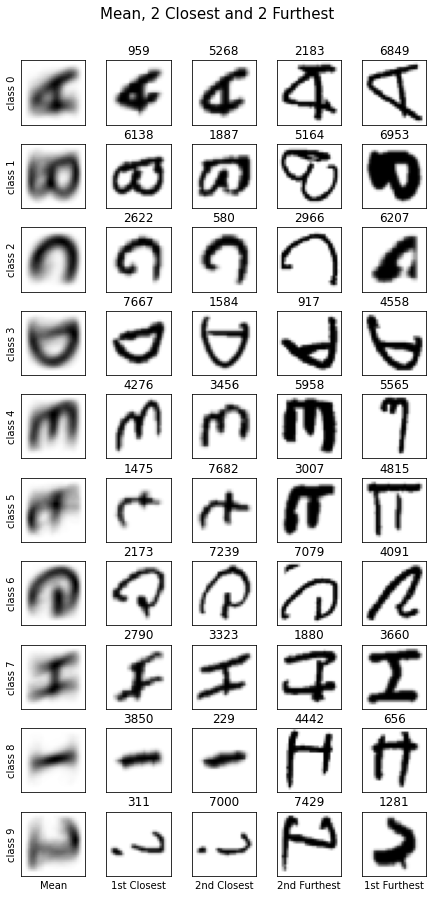

In [15]:
# 1.2
class_samples = {i: Xtrn[Ytrn == i] for i in range(10)}
class_mean_sample = {i: class_samples[i].mean(axis=0) for i in range(10)}
dist_to_class_mean_idx = {i: np.linalg.norm(class_samples[i] - class_mean_sample[i], axis=1).argsort() for i in range(10)}
sorted_by_class_mean = {i: class_samples[i][dist_to_class_mean_idx[i]] for i in range(10)}
samples_to_plot = {i: [class_mean_sample[i], *sorted_by_class_mean[i][:2], *sorted_by_class_mean[i][-2:]] for i in range(10)}
sample_indexes = {i: list(map(lambda x: (Xtrn == x).all(axis=1).nonzero()[0][0], samples_to_plot[i][1:])) for i in range(10)}

# Setting up the subplots
fig, ax = plt.subplots(nrows=10, ncols=5, sharex="col", sharey="row",
                figsize=(7.5, 15), subplot_kw={'xticks':[], 'yticks':[]},
                gridspec_kw=dict(hspace=0.3, wspace=0.1))

_xlabels = ["Mean", "1st Closest", "2nd Closest", "2nd Furthest", "1st Furthest"]
for i in range(10):
    for j in range(5):
        ax[i, 0].set_ylabel(f"class {i}")
        if j != 0:
            ax[i, j].title.set_text(f"{sample_indexes[i][j - 1]}")
        img = samples_to_plot[i][j].reshape((28, 28))
        ax[i, j].imshow(img, cmap="gray_r")

for i in range(len(_xlabels)):        
    ax[-1, i].set_xlabel(_xlabels[i])

fig.suptitle("Mean, 2 Closest and 2 Furthest", fontsize=15, y=0.93)
plt.savefig("results/1_2.png")
plt.show()

In [8]:
euclidean_distances(Xtrn_m, Xtrn_m)

array([[ 0.        , 10.18004395, 14.41729439, ..., 11.57802476,
        11.83740934, 13.62622875],
       [10.18004395,  0.        , 13.60719781, ..., 10.61453451,
        13.08853066, 14.19945253],
       [14.41729439, 13.60719781,  0.        , ..., 11.03996654,
        13.52695687, 15.31988277],
       ...,
       [11.57802476, 10.61453451, 11.03996654, ...,  0.        ,
        12.23661381, 13.04234903],
       [11.83740934, 13.08853066, 13.52695687, ..., 12.23661381,
         0.        , 11.90212617],
       [13.62622875, 14.19945253, 15.31988277, ..., 13.04234903,
        11.90212617,  0.        ]])

In [9]:
euclidean_distances(Xtrn, Xtrn)
# they are exactly the same. Normalised means both instances are mean vector subtracted. 
#Thus subtracting two instances will cancel of the mean and eventually compute the same distance

array([[ 0.        , 10.18004395, 14.41729439, ..., 11.57802476,
        11.83740934, 13.62622875],
       [10.18004395,  0.        , 13.60719781, ..., 10.61453451,
        13.08853066, 14.19945253],
       [14.41729439, 13.60719781,  0.        , ..., 11.03996654,
        13.52695687, 15.31988277],
       ...,
       [11.57802476, 10.61453451, 11.03996654, ...,  0.        ,
        12.23661381, 13.04234903],
       [11.83740934, 13.08853066, 13.52695687, ..., 12.23661381,
         0.        , 11.90212617],
       [13.62622875, 14.19945253, 15.31988277, ..., 13.04234903,
        11.90212617,  0.        ]])

In [18]:
np.mean(Xtst, axis=0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.01659125e-06,
       6.03318250e-06, 1.35746606e-05, 7.54147813e-05, 1.91553544e-04,
       2.59426848e-04, 3.33333333e-04, 4.16289593e-04, 3.86123680e-04,
       3.34841629e-04, 4.97737557e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.50829563e-06, 6.48567119e-05, 2.24736048e-04,
       4.22322775e-04, 1.11161388e-03, 1.24283560e-03, 1.21719457e-03,
       8.62745098e-04, 9.00452489e-04, 9.12518854e-04, 1.12669683e-03,
       1.34992459e-03, 1.96832579e-03, 2.28657617e-03, 2.23680241e-03,
       2.82352941e-03, 3.19758673e-03, 2.96530920e-03, 2.50980392e-03,
       2.27149321e-03, 2.31372549e-03, 1.53242836e-03, 1.09803922e-03,
       8.00904977e-04, 2.60935143e-04, 2.26244344e-05, 0.00000000e+00,
      

In [19]:
np.mean(Xtrn, axis=0)
# We can clearly see the difference in the mean vector.
# However, we only want to use the mean vector of the training set.
# This is because we want to keep the testing data to be a new set of data
# this means that we are testing the test set with prior knowledge of the data set leading inaccuracy
# sampling errors may negatively bias the predictions 
# our aim is to test and evaluate whether our model can fit the testing data.

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.41880342e-05, 2.82051282e-04, 3.30819507e-04,
       2.29763700e-04, 4.87682252e-05, 2.51382604e-06, 1.70940171e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.01106083e-06, 3.36852690e-05, 1.00553042e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.01659125e-06, 3.72046254e-05, 1.14630468e-04,
       4.48969331e-04, 8.70789341e-04, 1.82001006e-03, 2.59979889e-03,
       2.76520865e-03, 1.90799397e-03, 1.22222222e-03, 9.53242836e-04,
       8.42634490e-04, 7.53142283e-04, 1.10960282e-03, 1.63700352e-03,
       1.85570639e-03, 2.15585721e-03, 2.40070387e-03, 2.25540473e-03,
       2.15434892e-03, 1.75766717e-03, 1.64705882e-03, 1.47561589e-03,
       9.02463550e-04, 2.82051282e-04, 1.00553042e-05, 0.00000000e+00,
      

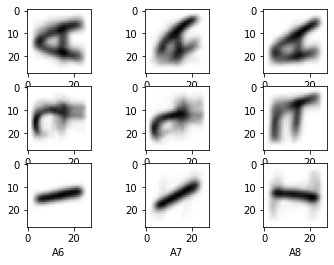

In [13]:
classes = [0,5,8]
classcentres = []
km3 = KMeans(n_clusters = 3, random_state=0)
for i in classes:
    km3.fit(Xtrn[Ytrn==i])
    centres = km3.cluster_centers_
    for ci in centres:
        classcentres.append(ci)

fig, axs = plt.subplots(3, 3) #ploting 3 by 3 histogram
axs = axs.ravel()

for i in range(len(classcentres)):
    axs[i].imshow(classcentres[i].reshape((28,28)),cmap = "gray_r")
    axs[i].set(xlabel=f"A{i}")

# for ax in axs.flat:
#     ax.set(ylabel='frequency')
    
    # ax.label_outer()
plt.savefig("results/2_3_1.png")
plt.show()

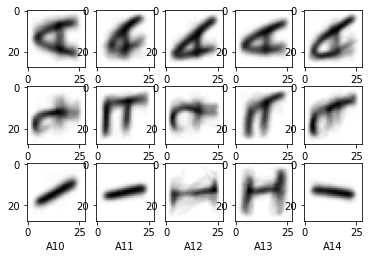

In [21]:
classes = [0,5,8]
classcentres = []
km5 = KMeans(n_clusters = 5, random_state=0)
for i in classes:
    km5.fit(Xtrn[Ytrn==i])
    centres = km5.cluster_centers_
    for ci in centres:
        classcentres.append(ci)

fig, axs = plt.subplots(3, 5) #ploting 3 by 3 histogram
axs = axs.ravel()

for i in range(len(classcentres)):
    axs[i].imshow(classcentres[i].reshape((28,28)),cmap = "gray_r")
    axs[i].set(xlabel=f"A{i}")

# for ax in axs.flat:
#     ax.set(ylabel='frequency')
    
    # ax.label_outer()
plt.savefig("results/2_3_2.png")
plt.show()

In [22]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(Xtrn_m, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn_m, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst_m, Ytst):.4f}')

Classification accuracy on training set: 0.9162
Classification accuracy on test set: 0.7223


In [23]:
print(lr.predict(Xtst_m))
print(Ytst)

[18 14  3 ...  9  5 18]
[16 16 14 ...  9 17 18]


In [24]:
predicty = lr.predict(Xtst_m)
nomatchidx = []
for i in range(len(Ytst)):
    if (Ytst[i]!=predicty[i]):
        nomatchidx.append(Ytst[i])
np.unique(nomatchidx, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 array([32, 30, 10, 16, 34, 23, 29, 27, 42, 33, 38, 53, 12, 36, 18, 13, 28,
        48, 26, 10, 27, 26, 22, 35, 25, 29], dtype=int64))

In [25]:
u, count = np.unique(nomatchidx, return_counts=True)
countsort = np.argsort(-count)
u = u[countsort]
u[0:5]
alphabet = []
for i in u[0:5]:
    alphabet.append(chr(ord('@')+i+1))
print(u[0:5])
print(alphabet)


[11 17  8 10 13]
['L', 'R', 'I', 'K', 'N']


In [26]:
# lbfgs
lr = LogisticRegression(max_iter=1000, random_state=0, penalty='none', solver="lbfgs")
lr.fit(Xtrn, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst, Ytst):.4f}')

lr = LogisticRegression(max_iter=1000, random_state=0, penalty='l2', solver="lbfgs")
lr.fit(Xtrn, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst, Ytst):.4f}')


Classification accuracy on training set: 1.0000
Classification accuracy on test set: 0.6158
Classification accuracy on training set: 0.9162
Classification accuracy on test set: 0.7219


In [27]:
lr = LogisticRegression(max_iter=1000, random_state=0, penalty='l2', solver="newton-cg", C=0.1)
lr.fit(Xtrn_m, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn_m, Ytrn):}')
print(f'Classification accuracy on test set: {lr.score(Xtst_m, Ytst):}')

Classification accuracy on training set: 0.8448717948717949
Classification accuracy on test set: 0.7473076923076923


C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Classification accuracy on training set: 1.0
Classification accuracy on test set: 0.5957692307692307


In [7]:
np.logspace(-3,2,6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [10]:
grid={"C":np.logspace(-3,2,6), "penalty":["l2","none"], "solver":["newton-cg"]}# l2 ridge and none regularisation
logreg=LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
logreg_cv=GridSearchCV(logreg, grid, cv=cv, scoring = "accuracy", n_jobs=-1)
logreg_cv.fit(Xtrn_m,Ytrn)

# print(logreg_cv.cv_results_)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
means = logreg_cv.cv_results_['mean_test_score']
stds = logreg_cv.cv_results_['std_test_score']
params = logreg_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.7553846153846152
Best: 0.755385 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.656496 (0.015345) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.013532) with: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
0.730855 (0.014087) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.013532) with: {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
0.755385 (0.016333) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.013532) with: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.725043 (0.015778) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.013532) with: {'C': 1.0, 'penalty': 'none', 'solver': 'newton-cg'}
0.675299 (0.013458) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.013532) with: {'C': 10.0, 'penalty': 'none', 'solver': 'newton-cg'}
0.651923 (0.01288

In [31]:
# save the model to disk
filename_lr = 'lrmodel.sav'
# pickle.dump(logreg_cv, open(f"saved_models/{filename_lr}", 'wb'))

In [32]:
# load the model from disk
loaded_lr_model = pickle.load(open(f"saved_models/{filename_lr}", 'rb'))

loaded_lr_model.cv_results_["params"]

[{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'},
 {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'},
 {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'},
 {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 1.0, 'penalty': 'none', 'solver': 'newton-cg'},
 {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 10.0, 'penalty': 'none', 'solver': 'newton-cg'},
 {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 100.0, 'penalty': 'none', 'solver': 'newton-cg'}]

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
[0.65649573 0.7308547  0.75538462 0.72504274 0.67529915 0.65192308]


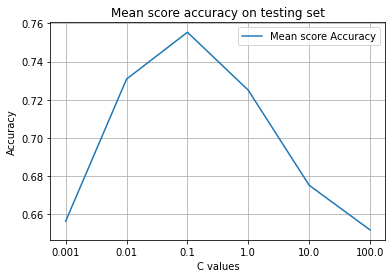

In [35]:
cs = []

for i in range(len(loaded_lr_model.cv_results_["params"])):
    cs.append(loaded_lr_model.cv_results_["params"][i]["C"])
    

print(cs[::2])
cs = [str(i) for i in cs[::2]]
print(loaded_lr_model.cv_results_["mean_test_score"][::2])

plt.plot(cs, loaded_lr_model.cv_results_["mean_test_score"][::2], label= "Mean score Accuracy")
plt.title("Mean score accuracy on testing set")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

In [ ]:
grid={"C":[0.01, 0.1, 0.5, 1.0, 5.0, 10.0], "penalty":["l2","l1"]}# l1 lasso and l2 ridge
logreg=LogisticRegression(max_iter=1000, random_state=0)
logreg_cv=GridSearchCV(logreg, grid, scoring = "accuracy")
logreg_cv.fit(Xtrn_m,Ytrn)

# print(logreg_cv.cv_results_)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
means = logreg_cv.cv_results_['mean_test_score']
stds = logreg_cv.cv_results_['std_test_score']
params = logreg_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [12]:
grid={"C":[0.01, 0.1, 0.5, 1.0, 5.0, 10.0], "penalty":["l2","none"], "solver":["lbfgs"]}# l2 ridge and none regularisation
logreg=LogisticRegression(max_iter=1000, random_state=0)
logreg_cv=GridSearchCV(logreg, grid,cv=10, scoring = "accuracy", n_jobs=-1)
logreg_cv.fit(Xtrn_m,Ytrn)

# print(logreg_cv.cv_results_)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
means = logreg_cv.cv_results_['mean_test_score']
stds = logreg_cv.cv_results_['std_test_score']
params = logreg_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7535897435897436
Best: 0.753590 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.727949 (0.010631) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642821 (0.012246) with: {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.753590 (0.009179) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642821 (0.012246) with: {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.734615 (0.011666) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642821 (0.012246) with: {'C': 0.5, 'penalty': 'none', 'solver': 'lbfgs'}
0.721667 (0.011002) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642821 (0.012246) with: {'C': 1.0, 'penalty': 'none', 'solver': 'lbfgs'}
0.686923 (0.011600) with: {'C': 5.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642821 (0.012246) with: {'C': 5.0, 'penalty': 'none', 'solver': 'lbfgs'}
0.676923 (0.009289) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","none"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrn_m,Ytrn)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrn_sc = sc.fit_transform(Xtrn)
Xtst_sc = sc.transform(Xtst)

lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(Xtrn_sc, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn_sc, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst_sc, Ytst):.4f}')

Classification accuracy on training set: 0.9850
Classification accuracy on test set: 0.6738


C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
lr = LogisticRegression(max_iter=1000, random_state=0, penalty='none', solver="newton-cg")
lr.fit(Xtrn_m, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn_m, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst_m, Ytst):.4f}')

Classification accuracy on training set: 1.0000
Classification accuracy on test set: 0.5958


In [21]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(Xtrn_m, Ytrn)
print(f'Classification accuracy on training set: {lr.score(Xtrn_m, Ytrn):.4f}')
print(f'Classification accuracy on test set: {lr.score(Xtst_m, Ytst):.4f}')

C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


Classification accuracy on training set: 0.9162
Classification accuracy on test set: 0.7223


In [10]:
# example of grid searching key hyperparametres for logistic regression
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression(max_iter = 1000, random_state=0)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtrn_m, Ytrn)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753590 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.618846 (0.008315) with: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}
0.634744 (0.012558) with: {'C': 1e-05, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'none', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'l1', 'solver': 'lbfgs'}
0.038462 (0.000000) with: {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'}
0.561923 (0.005418) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.562436 (0.005138) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}
0.452564 (0.008845) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1e-05, 'penalty': 'el

In [74]:
meanvec = Xtrn_m[Ytrn==0][0].reshape((28,28)).mean(axis=0)
meanvec
meanvec = np.mean(Xtrn_m[Ytrn==0], axis=0)
# meanvec = Xtrn_m[Ytrn==0].mean(axis=1)
meanvec.shape

(784,)

In [28]:
covMatrix = np.cov(Xtrn_m[Ytrn==0], ddof=1)
print(covMatrix.shape)
print(np.mean(covMatrix))
print(np.max(covMatrix), np.min(covMatrix))
# sns.heatmap(covMatrix, annot=True, fmt='g')
# for i in covMatrix:
#     sns.heatmap(i, annot=True, fmt='g')
# plt.show()


(300, 300)
0.017079531291251494
0.1263636921707994 -0.03406302044592519


In [29]:
di = np.diag(covMatrix)
print(di.shape)
print(np.mean(di))
print(np.max(di))
print(np.min(di))

(300,)
0.08753841090172279
0.1263636921707994
0.053432219716010185


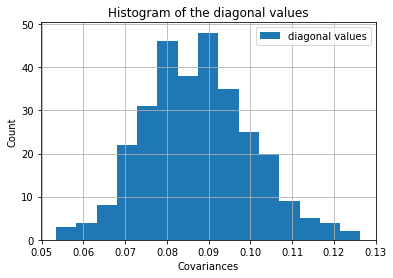

In [30]:
plt.hist(di, bins=15, label="diagonal values")
plt.title("Histogram of the diagonal values")
plt.xlabel("Covariances")
plt.ylabel("Count")
plt.grid()
plt.legend()
plt.show()

In [75]:
xinput = Xtst_m[Ytst==0]
print(meanvec.shape)
rv = scipy.stats.multivariate_normal(xinput, meanvec, covMatrix)
# rv.pdf(xinput)

(784,)


ValueError: Array 'mean' must be a vector of length 78400.

In [45]:
classAtrn = Xtrn_m[Ytrn==0]
classAtst = Xtst_m[Ytst==0]
log_likelihoods_ = []

gmm_n = GaussianMixture(n_components=1, covariance_type='full').fit(classAtrn)
log_likelihoods_.extend([gmm_n.score(classAtrn), gmm_n.score(classAtst)])

log_likelihoods_

C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3094.4740561719773, -749022.5523599446]

In [46]:
log_likelihoods_ = []
for i in range(26):
    gmm_n = GaussianMixture(n_components=1, covariance_type='full').fit(Xtrn_m[Ytrn==i])
    log_likelihoods_.extend([[gmm_n.score(Xtrn_m[Ytrn==i]), gmm_n.score(Xtst_m[Ytst==i])]]) 

C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\flame\anaconda3\envs\iaml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is k

In [47]:
log_likelihoods_

[[3094.4740561719773, -749022.5523599446],
 [3028.592242855817, -1145120.1180848505],
 [3183.3620394440754, -315577.6699687445],
 [3094.7060237164883, -640496.923263437],
 [3103.1293581683126, -608898.9993037216],
 [3095.9763694863427, -553434.1511908357],
 [3064.6203718261577, -861421.2443552564],
 [3084.320540074398, -757349.3137933795],
 [3469.177436821219, -199407.20561539524],
 [3126.17024910694, -572040.8052706064],
 [3087.6354392615053, -748206.2201039733],
 [3351.4705473177314, -220263.8502833145],
 [3100.4286463612434, -593073.0676296272],
 [3109.741619886484, -599626.3900574708],
 [3235.8265446344435, -225773.8436781058],
 [3146.391222862208, -457807.56996338995],
 [3026.0225596788346, -1085752.7255168052],
 [3081.1300084506547, -966496.8953821703],
 [3164.719131172783, -463408.24933394755],
 [3190.5649903833973, -305005.4167702005],
 [3130.1320626408583, -451009.4438529659],
 [3207.508500445795, -338345.2373330442],
 [3064.38883265503, -917439.2530451245],
 [3134.08711262952